In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG, img_to_array, array_to_img
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

In [2]:
path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
for _dir in sorted(os.listdir(path)):
    print(f'No. of images present in {_dir}: {len(os.listdir(os.path.join(path,_dir)))}')

No. of images present in A: 3000
No. of images present in B: 3000
No. of images present in C: 3000
No. of images present in D: 3000
No. of images present in E: 3000
No. of images present in F: 3000
No. of images present in G: 3000
No. of images present in H: 3000
No. of images present in I: 3000
No. of images present in J: 3000
No. of images present in K: 3000
No. of images present in L: 3000
No. of images present in M: 3000
No. of images present in N: 3000
No. of images present in O: 3000
No. of images present in P: 3000
No. of images present in Q: 3000
No. of images present in R: 3000
No. of images present in S: 3000
No. of images present in T: 3000
No. of images present in U: 3000
No. of images present in V: 3000
No. of images present in W: 3000
No. of images present in X: 3000
No. of images present in Y: 3000
No. of images present in Z: 3000
No. of images present in del: 3000
No. of images present in nothing: 3000
No. of images present in space: 3000


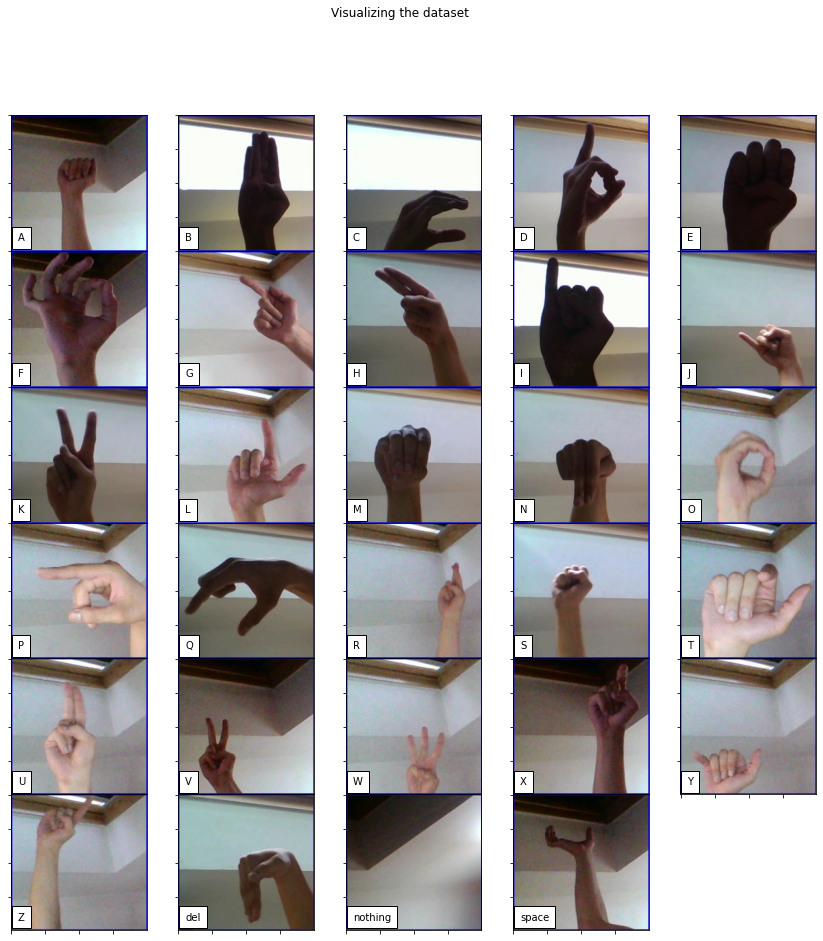

In [3]:
fig,axes = plt.subplots(6,5,figsize=(15,15))
ind = 0
for _dir in sorted(os.listdir(path)):
    imgPath = os.path.join(path,_dir)
    jpg = np.random.choice(os.listdir(imgPath),size=1)[0]
    _imgPath = os.path.join(imgPath,jpg)
    img = image.load_img(_imgPath)
    axes[ind//5][ind%5].set_xticklabels([])
    axes[ind//5][ind%5].set_yticklabels([])
    axes[ind//5][ind%5].set_aspect('equal')
    axes[ind//5][ind%5].imshow(img)
    axes[ind//5][ind%5].text(10,185,f'{_dir}',bbox={'facecolor': 'white', 'pad': 6})
    ind += 1
axes[5][4].remove()
plt.subplots_adjust(wspace=0, hspace=0)
fig.suptitle('Visualizing the dataset')
fig.show()

In [4]:
dataGen = IDG(preprocessing_function = preprocess_input,
              rotation_range=30, width_shift_range=0.2,
              height_shift_range=0.2,shear_range=0.2, zoom_range=0.2)
trainGen = IDG(preprocessing_function = preprocess_input,
              rotation_range=30, width_shift_range=0.2,
              height_shift_range=0.2,shear_range=0.2, zoom_range=0.2,
              validation_split=0.2)

In [5]:
train = trainGen.flow_from_directory(directory=path,target_size=(150,150),subset='training',class_mode='categorical',batch_size=512)
val = trainGen.flow_from_directory(directory=path,target_size=(150,150),subset='validation',class_mode='categorical',batch_size=512)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [6]:
print('Creating Model...')
inputs = Input(shape=(150,150,3))
baseModel = InceptionV3(include_top=False,weights='imagenet',input_shape=(150,150,3))
baseModel.trainable=False
x = baseModel(inputs,training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(29,activation='softmax')(x)
model = Model(inputs=inputs,outputs=outputs)
print('Model created successfully!')
model.summary()

Creating Model...
87924736/87910968 [==============================] - 0s 0us/step
Model created successfully!
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
________________

In [ ]:
callbacks = [ModelCheckpoint(filepath='weights.best.inc.male.hdf5',verbose=1,save_best_only=True),
             EarlyStopping(monitor='val_loss',mode='min',patience=10,min_delta=1e-1,restore_best_weights=True)]
print('Model compiling...')
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
print('Model compiled!')
start = time.process_time()
print('Model training started...')
history = model.fit(train,
          validation_data=val,
          epochs=50,
          callbacks=callbacks,
          verbose=1)
end = time.process_time
print(f'Model trained - Time taken: {end - start}')

Model compiling...
Model compiled!
Model training started...
Epoch 1/50
136/136 [==============================] - 897s 7s/step - loss: 2.6938 - accuracy: 0.2547 - val_loss: 2.3543 - val_accuracy: 0.3384

Epoch 00001: val_loss improved from inf to 2.35429, saving model to weights.best.inc.male.hdf5
Epoch 2/50
136/136 [==============================] - 552s 4s/step - loss: 1.7429 - accuracy: 0.4847 - val_loss: 1.9676 - val_accuracy: 0.4261

Epoch 00002: val_loss improved from 2.35429 to 1.96761, saving model to weights.best.inc.male.hdf5
Epoch 3/50
136/136 [==============================] - 549s 4s/step - loss: 1.3972 - accuracy: 0.5799 - val_loss: 1.8260 - val_accuracy: 0.4671

Epoch 00003: val_loss improved from 1.96761 to 1.82598, saving model to weights.best.inc.male.hdf5
Epoch 4/50
136/136 [==============================] - 546s 4s/step - loss: 1.2044 - accuracy: 0.6361 - val_loss: 1.9096 - val_accuracy: 0.4792

Epoch 00004: val_loss did not improve from 1.82598
Epoch 5/50
  5/136 